<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/Aged_pet_weight_loss_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
df =  pd.read_csv("/content/AGED PET MP.csv")

In [3]:
df.columns

Index(['time', 'tem', 'heating rate', 'weight loss', 'DTG', 'Unnamed: 5'], dtype='object')

In [4]:
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)

In [5]:
df_res =  df[['time', 'tem', 'heating rate', 'weight loss']]

In [6]:
label = df['label']

In [7]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [8]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df

,0,1,2,3
0,0.000000e+00,0.951972,0.000000,0.306185
1,8.906623e-07,0.016664,0.999847,0.005360
2,3.561241e-06,0.033313,0.999388,0.010710
3,8.006925e-06,0.049931,0.998624,0.016054
4,1.421887e-05,0.066504,0.997557,0.021381
...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338
4050,6.897649e-02,0.995683,0.014751,0.060328
4051,6.898151e-02,0.995684,0.014747,0.060318
4052,6.898723e-02,0.995684,0.014744,0.060308


In [9]:
transform_df = pd.concat([transform_df,root_series(df_res)],axis=1)
transform_df.columns = ['time', 'tem', 'heating rate', 'weight loss','Root']
transform_df

,time,tem,heating rate,weight loss,Root
0,0.000000e+00,0.951972,0.000000,0.306185,327.572675
1,8.906623e-07,0.016664,0.999847,0.005360,18712.667198
2,3.561241e-06,0.033313,0.999388,0.010710,9360.032248
3,8.006925e-06,0.049931,0.998624,0.016054,6244.594859
4,1.421887e-05,0.066504,0.997557,0.021381,4688.603984
...,...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338,978.433885
4050,6.897649e-02,0.995683,0.014751,0.060328,978.594327
4051,6.898151e-02,0.995684,0.014747,0.060318,978.764727
4052,6.898723e-02,0.995684,0.014744,0.060308,978.925169


In [10]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,weight loss,Root,label
0,0.000000e+00,0.951972,0.000000,0.306185,327.572675,Training
1,8.906623e-07,0.016664,0.999847,0.005360,18712.667198,Training
2,3.561241e-06,0.033313,0.999388,0.010710,9360.032248,Training
3,8.006925e-06,0.049931,0.998624,0.016054,6244.594859,Training
4,1.421887e-05,0.066504,0.997557,0.021381,4688.603984,Training
...,...,...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338,978.433885,Training
4050,6.897649e-02,0.995683,0.014751,0.060328,978.594327,Training
4051,6.898151e-02,0.995684,0.014747,0.060318,978.764727,Training
4052,6.898723e-02,0.995684,0.014744,0.060308,978.925169,Training


In [11]:
df_training = dataframe.loc[dataframe['label'] == "Training"]

In [12]:
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
DTCLF = DecisionTreeRegressor()

In [15]:
DTCLF.fit(X,y)

DecisionTreeRegressor()

For Validation Set

In [16]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']

In [17]:
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.047584
1,0.091689
2,0.129921
3,0.167677
4,0.173540
...,...
400,0.060746
401,0.060626
402,0.060506
403,0.060422


In [18]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.188637394029226e-07
RMSE 0.00046782875008161113
MAE 0.00011964300575718861
R2_Score 0.9999532087379268


In [19]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df

,time,tem,heating rate
0,0.000088,0.164170,0.985023
1,0.000304,0.300491,0.948919
2,0.000624,0.419084,0.898037
3,0.001017,0.517728,0.839559
4,0.001207,0.555353,0.812712
...,...,...,...
400,0.068728,0.995672,0.014909
401,0.068810,0.995676,0.014857
402,0.068883,0.995677,0.014817
403,0.068936,0.995681,0.014780


In [20]:
prediction = pd.DataFrame(predictions_val)

In [21]:
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [22]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)

In [23]:
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.047584,0.052711
1,0.000304,0.300491,0.948919,0.091689,0.096213
2,0.000624,0.419084,0.898037,0.129921,0.133786


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

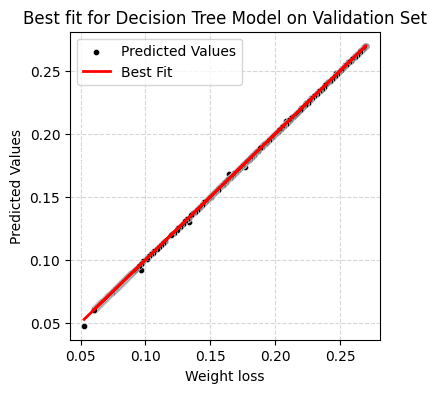

In [26]:
x = final_df['weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


For Test Set

In [27]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']

In [28]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.021381
1,0.105146
2,0.122015
3,0.158362
4,0.196155
...,...
401,0.060775
402,0.060664
403,0.060551
404,0.060443


In [29]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.197514609768627e-07
RMSE 0.0004687765576229924
MAE 0.00011986362019431375
R2_Score 0.9999531051295041


In [30]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000022,0.083016,0.996191
1,0.000335,0.314620,0.943859
2,0.000546,0.394437,0.910238
3,0.000970,0.507735,0.846225
4,0.001658,0.627462,0.752954
...,...,...,...
401,0.068721,0.995672,0.014913
402,0.068776,0.995674,0.014879
403,0.068849,0.995677,0.014835
404,0.068927,0.995680,0.014787


In [31]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.021381,0.026688
1,0.000335,0.314620,0.943859,0.105146,0.100723
2,0.000546,0.394437,0.910238,0.122015,0.126040
3,0.000970,0.507735,0.846225,0.158362,0.161575
4,0.001658,0.627462,0.752954,0.196155,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.060775,0.060765
402,0.068776,0.995674,0.014879,0.060664,0.060677
403,0.068849,0.995677,0.014835,0.060551,0.060561
404,0.068927,0.995680,0.014787,0.060443,0.060434


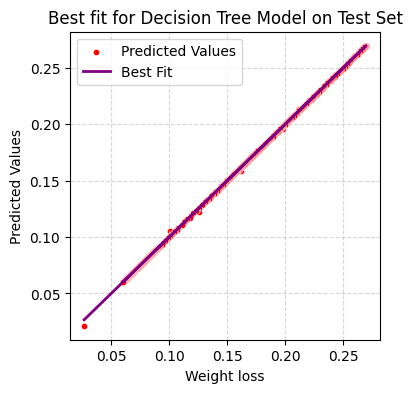

In [34]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='Red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='purple', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Test Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

Random Forest For Validation Set

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rfc = RandomForestRegressor()

In [37]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']

In [38]:
rfc.fit(X,y)

RandomForestRegressor()

In [39]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']
predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.8789522443618638e-08
RMSE 0.00016967475488009003
MAE 3.8908506781574334e-05
R2_Score 0.9999938450375869


In [40]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.052162,0.052711
1,0.000304,0.300491,0.948919,0.093350,0.096213
2,0.000624,0.419084,0.898037,0.133169,0.133786


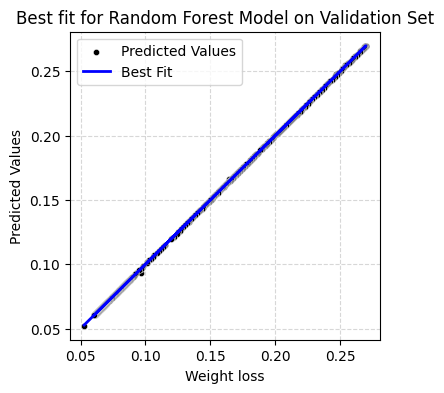

In [42]:
x = final_df['weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='Blue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Validation Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

Random Forest For Test Set

In [43]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']
predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.024125
1,0.102476
2,0.124236
3,0.158801
4,0.198679
...,...
401,0.060768
402,0.060671
403,0.060560
404,0.060432


In [44]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 5.5257331393720514e-08
RMSE 0.00023506878013407163
MAE 4.811901827871284e-05
R2_Score 0.9999882081084324


In [45]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.024125,0.026688
1,0.000335,0.314620,0.943859,0.102476,0.100723
2,0.000546,0.394437,0.910238,0.124236,0.126040
3,0.000970,0.507735,0.846225,0.158801,0.161575
4,0.001658,0.627462,0.752954,0.198679,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.060768,0.060765
402,0.068776,0.995674,0.014879,0.060671,0.060677
403,0.068849,0.995677,0.014835,0.060560,0.060561
404,0.068927,0.995680,0.014787,0.060432,0.060434


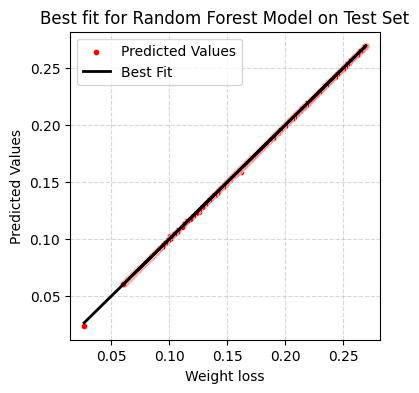

In [48]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='Red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Test Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

SVM for Validation Set

In [49]:
from sklearn.svm import SVR

In [50]:
svr = SVR()

In [51]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']
svr.fit(X,y)

SVR()

In [52]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']
predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 0.004725533513874425
RMSE 0.06874251605720018
MAE 0.05997195727913627
R2_Score -0.010280084249488342


In [53]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.109592,0.052711
1,0.000304,0.300491,0.948919,0.116920,0.096213
2,0.000624,0.419084,0.898037,0.125603,0.133786


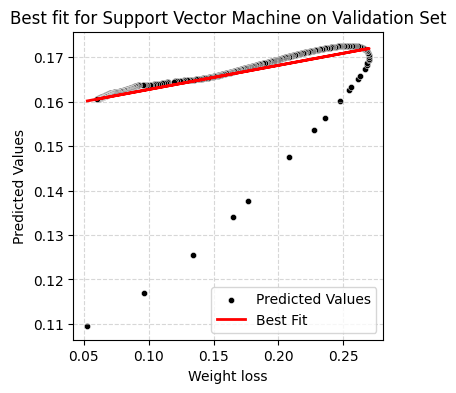

In [57]:
x = final_df['weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Validation Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

SVM for Test Set

In [58]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']
predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.106730
1,0.117850
2,0.123644
3,0.133200
4,0.144368
...,...
401,0.160594
402,0.160582
403,0.160566
404,0.160549


In [59]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 0.004723726575406931
RMSE 0.06872937199921829
MAE 0.05995299867920979
R2_Score -0.00804128913227209


In [60]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.106730,0.026688
1,0.000335,0.314620,0.943859,0.117850,0.100723
2,0.000546,0.394437,0.910238,0.123644,0.126040
3,0.000970,0.507735,0.846225,0.133200,0.161575
4,0.001658,0.627462,0.752954,0.144368,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.160594,0.060765
402,0.068776,0.995674,0.014879,0.160582,0.060677
403,0.068849,0.995677,0.014835,0.160566,0.060561
404,0.068927,0.995680,0.014787,0.160549,0.060434


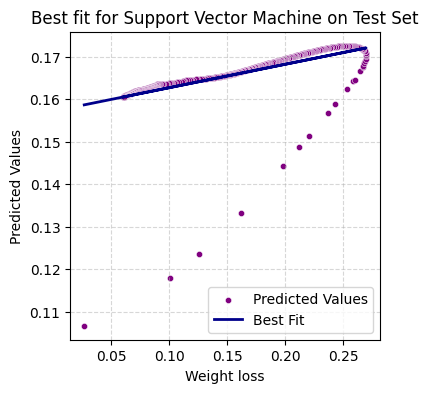

In [62]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='purple', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='darkblue', label='Best Fit', linewidth=2)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Test Set')
plt.xlabel('Weight loss')  # Set the x-axis label to 'Weight loss'
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()